In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [2]:
df = pd.read_csv('cleaned_vehicles.csv')

In [3]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,leather_seats
0,35990,2010,chevrolet,good,8,gas,32742.0,clean,automatic,rwd,NaN,other,NaN,0
1,7500,2014,hyundai,excellent,4,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,0
2,4900,2006,bmw,good,6,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,0
3,2000,1974,chevrolet,good,4,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,0
4,19500,2005,ford,excellent,8,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,1


In [4]:
exp = setup(df, target = 'price', 
            train_size = 0.75, 
            categorical_features = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'],
            use_gpu = True,
            remove_outliers = True,
            feature_selection = True)

,Description,Value
0,session_id,4240
1,Target,price
2,Original Data,"(400724, 14)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(285515, 82)"


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1744.5902,13140425.8519,3624.7585,0.8946,0.4214,0.4004,63.0010
rf,Random Forest Regressor,1945.0719,13662857.6040,3696.1514,0.8904,0.4355,0.4418,39.9620
xgboost,Extreme Gradient Boosting,3016.0515,21059060.2000,4588.8906,0.8311,0.5256,0.6708,2.6820
dt,Decision Tree Regressor,2295.7276,22483590.5849,4741.3528,0.8197,0.5286,0.4526,4.0850
lightgbm,Light Gradient Boosting Machine,3263.6855,23887937.6225,4887.4292,0.8084,0.5325,0.7117,0.8510
gbr,Gradient Boosting Regressor,3790.0847,30678439.1611,5538.6703,0.7539,0.5700,0.8041,46.9420
ridge,Ridge Regression,4888.4192,45421981.2000,6739.4734,0.6357,0.7553,1.0366,0.1590
br,Bayesian Ridge,4888.3291,45421953.6916,6739.4714,0.6357,0.7555,1.0366,1.9970
lasso,Lasso Regression,4887.5789,45427402.0000,6739.8761,0.6356,0.7567,1.0362,20.5510
knn,K Neighbors Regressor,4292.8358,45596041.2000,6752.3824,0.6343,0.6137,0.7433,9.3560


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4240, verbose=0, warm_start=False)

In [6]:
et = create_model('et', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1821.7682,13907251.2137,3729.2427,0.8877,0.4401,0.4426
1,1782.7016,13219739.7932,3635.8960,0.8943,0.4258,0.4041
2,1812.2774,13846635.0229,3721.1067,0.8892,0.4287,0.4168
3,1797.1401,13677439.2209,3698.3022,0.8899,0.4252,0.4115
4,1779.5390,13385351.0410,3658.5996,0.8933,0.4199,0.3957
Mean,1798.6853,13607283.2584,3688.6294,0.8909,0.4279,0.4142
SD,16.3830,265192.6647,36.0011,0.0025,0.0067,0.0159


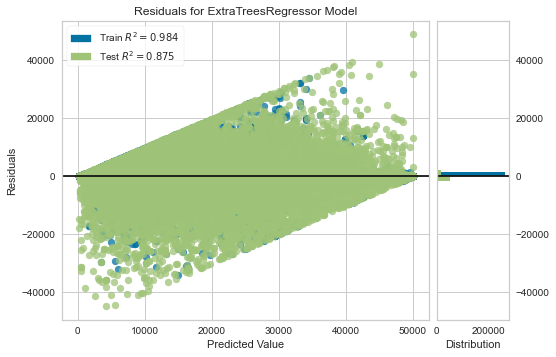

In [8]:
plot_model(et, plot = 'residuals')

In [10]:
save_model(et, model_name = 'model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['manufacturer',
                                                             'condition', 'fuel',
                                                             'title_status',
                                                             'transmission',
                                                             'drive', 'size',
                                                             'type',
                                                             'paint_color'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorica...
                  ExtraTreesRegressor(boo